# Librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import re
import scipy.stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exercise 1 (1 point)


Read file IMDb_All_Genres_etf_clean1.csv
It contains information of more than 5000 films in IMDB
- 'Movie_Title' : Consist of 5000+ Movie Titles (5000+ Unique Values)
- 'Year' : Ranging from 1920s to 2022 (99 Unique Values)
- 'Director' : Names the Director (2000+ Unique Values)
- 'Actors' : Names the Actors (5000+ Unique & Multiple Values)
- 'Rating' : Titles rated for 10 by 25k+ Voters (74+ Unique Values)
- 'main_genre' : Main Genre of the Title (13+ Unique Values)
- 'side_genre' : Side / Multiple Genre of the Movie (144+ Unique & Multiple Values)
- 'Runtime(Mins)' : Total duration of the movie in Minutes (156+ Unique Values)
- 'Censor' : Censorship of the Movie (25+ Unique Values)
- 'Total_Gross' : Total Box-Office Collection of the Movie (3500+ Unique Values)


In [3]:
data = pd.read_csv("IMDb_All_Genres_etf_clean1.csv", sep=',')

# Exercise 2 (1 point)

- Change the Total_Gross to number (numer of $M) 
- Use the function re.sub(pattern, repl, string, count=0, flags=0), for regular expressions
- Total_Gross = float(re.sub("\$", "", Total_Gross_old)) # note, you should also eliminate the final M
- Remove rows with  'Gross Unkown' 


In [4]:
data = data[data['Total_Gross'] != "Gross Unkown"].reset_index()

In [5]:
data['Total_Gross'] = [float(re.sub("M","",re.sub("\$", "", i))) for i in data['Total_Gross'].values]

# Exercise 3 (2 point)

Divide films by decade, do a barplot with the number of times of the most 5 popular genres ('main_genre') 

In [6]:
data['decade'] = data['Year'] - data['Year'] % 10

In [7]:
data.groupby(['decade','main_genre']).count()

index  Movie_Title  Year  Director  Actors  Rating  \
decade main_genre                                                       
1920   Action          2            2     2         2       2       2   
       Adventure       1            1     1         1       1       1   
       Biography       1            1     1         1       1       1   
       Comedy          1            1     1         1       1       1   
       Drama           3            3     3         3       3       3   
...                  ...          ...   ...       ...     ...     ...   
2020   Adventure       4            4     4         4       4       4   
       Animation       6            6     6         6       6       6   
       Drama           4            4     4         4       4       4   
       Fantasy         1            1     1         1       1       1   
       Horror          1            1     1         1       1       1   

                   Runtime(Mins)  Censor  Total_Gross  side_genre  
decade main_genre                                                  
1920   Action                  2       2            2           2  
       Adventure               1       1            1           1  
       Biography               1       1            1           1  
       Comedy                  1       1            1           1  
       Drama                   3       3            3           3  
...                          ...     ...          ...         ...  
2020   Adventure               4       4            4           4  
       Animation               6       6            6           6  
       Drama                   4       4            4           4  
       Fantasy                 1       1            1           1  
       Horror                  1       1            1           1  

[88 rows x 10 columns]

In [8]:
data.groupby(['decade','main_genre']).count()['Movie_Title']

decade  main_genre
1920    Action        2
        Adventure     1
        Biography     1
        Comedy        1
        Drama         3
                     ..
2020    Adventure     4
        Animation     6
        Drama         4
        Fantasy       1
        Horror        1
Name: Movie_Title, Length: 88, dtype: int64

In [13]:
df = data.groupby(['decade','main_genre']).count()['Movie_Title'].reset_index()
df.head()

,decade,main_genre,Movie_Title
0,1920,Action,2
1,1920,Adventure,1
2,1920,Biography,1
3,1920,Comedy,1
4,1920,Drama,3


In [25]:
#save only top 5 genres per decade
df2 = df[df['decade'] == 1920]
df2 = df2.sort_values(by='Movie_Title', ascending=False)
df2 = df2.head(5)

#df2.sort_values

for D in range(1930, 2021, 10):
    aux = df[df['decade'] == D]
    aux = aux.sort_values(by=['Movie_Title'], ascending=False)
    for i in range(5):
       df2 = df2._append(aux.iloc[i,:])

df2 = df2.sort_values(by=['Movie_Title'], ascending=False)

df2['Count'] = df2['Movie_Title']

#show order in each decade
print(df2[df2['decade'] == 1920])

   decade main_genre  Movie_Title  Count
4    1920      Drama            3      3
0    1920     Action            2      2
3    1920     Comedy            1      1
2    1920  Biography            1      1
1    1920  Adventure            1      1


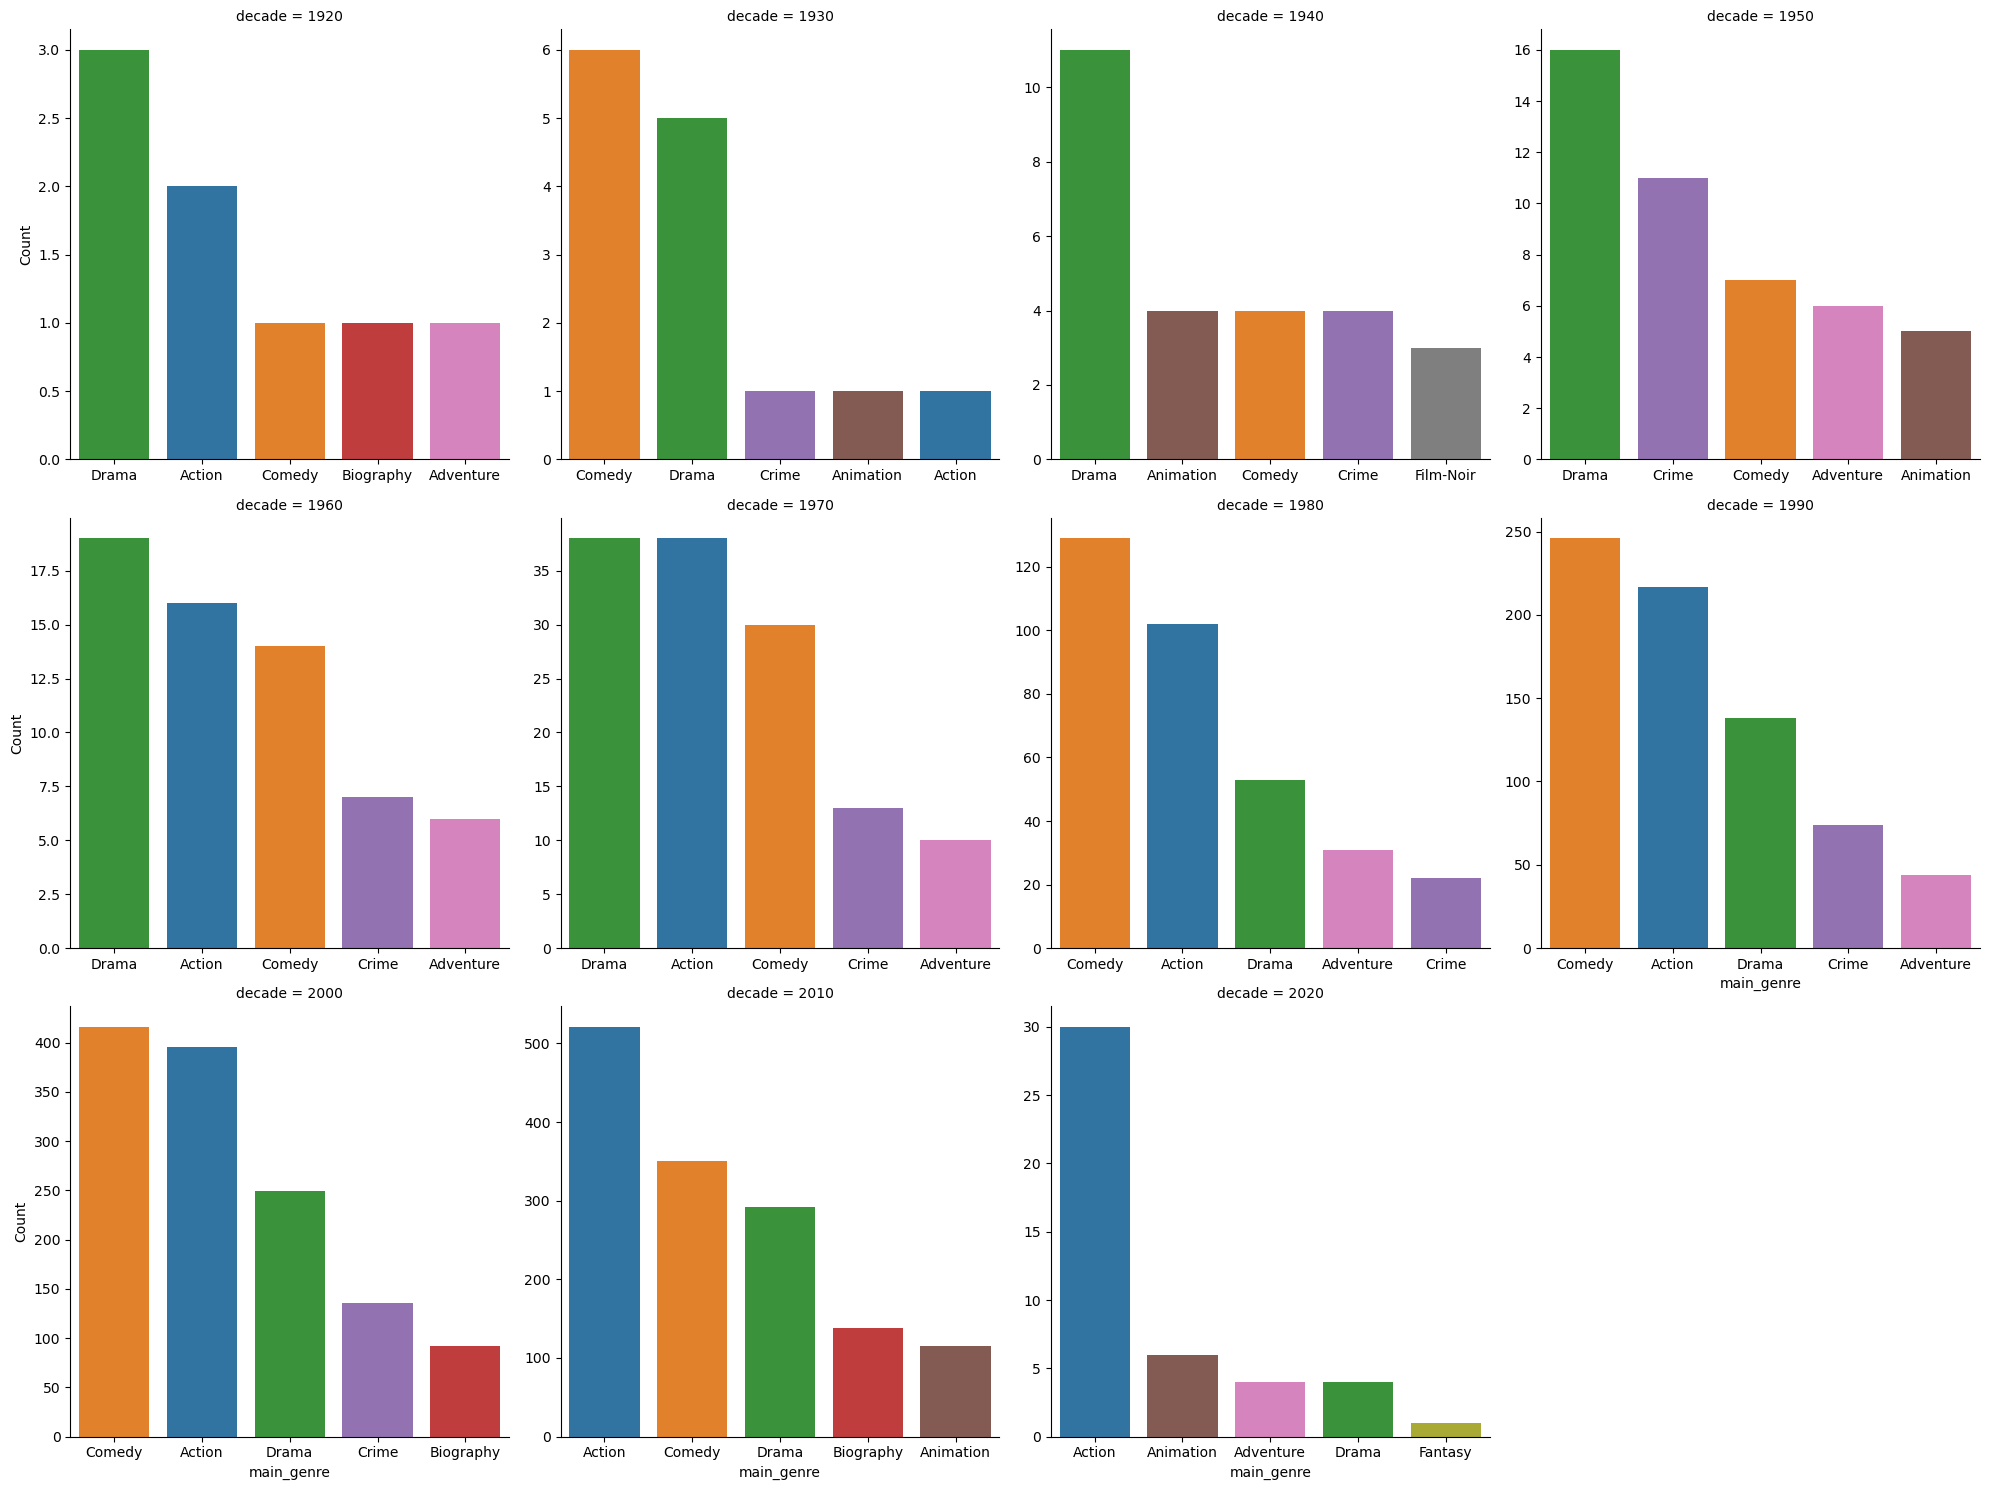

In [26]:

sns.catplot(kind = "bar", x = "main_genre",
            y = "Count", col="decade", col_wrap=4, hue = "main_genre" , sharex=False, sharey=False,
            legend=False, data = df2)


# Exercise 4 (1 point)

- Draw the mean income by main_genre along decades
- For this plot, only retain genres that appear more than 200 times in total
- Remember that sns.relplot(kind = "line") uses the mean value


In [36]:
genders = data.groupby('main_genre').count()['index'].sort_values(ascending=False).reset_index()
genders = genders[genders['index'] > 200]
genders.head(20)

,main_genre,index
0,Action,1326
1,Comedy,1203
2,Drama,828
3,Crime,355
4,Biography,302
5,Animation,279
6,Adventure,263


In [41]:
data2 = data[data['main_genre'].isin(genders['main_genre'].values)]
data2['main_genre'].unique()

array(['Action', 'Animation', 'Biography', 'Adventure', 'Drama', 'Crime',
       'Comedy'], dtype=object)

In [51]:
df3 = data2.groupby(['decade','main_genre'])['Total_Gross'].mean().reset_index()

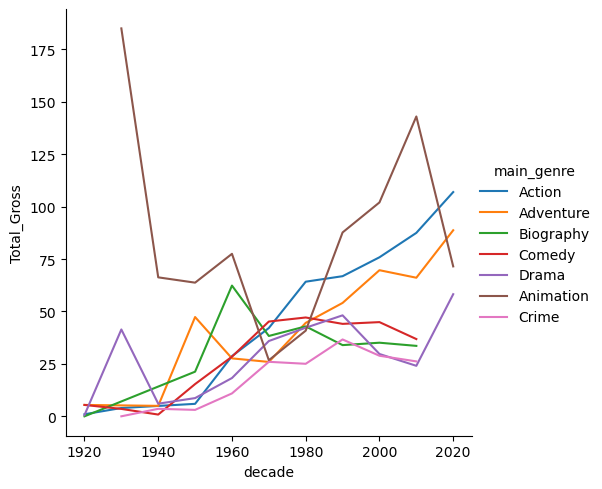

In [52]:
sns.relplot(kind = "line", x = "decade", y = "Total_Gross", hue = "main_genre", data = df3)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama'],
      dtype='object', name='main_genre')


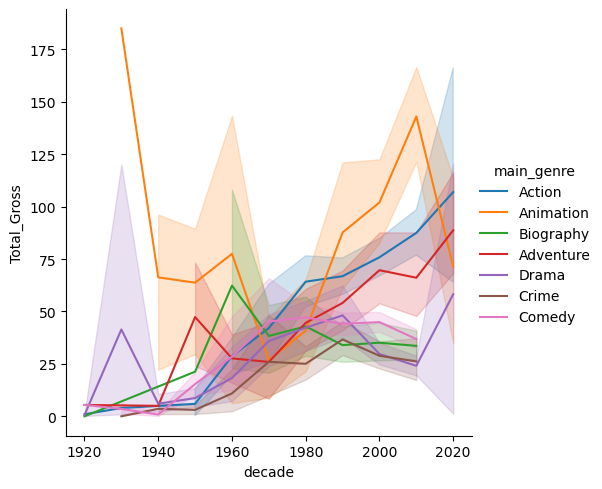

In [56]:
df = data.groupby(['main_genre'])['main_genre'].count()
df = df[df>200].index
print(df)

sns.relplot(kind = "line",
            data = data[data.main_genre.isin(df).values],
            x = "decade",
            y = "Total_Gross", hue = "main_genre")


# Exercise 5 (3 point)

- Determine if any main genre is "better" than the rest.? (Hint: compare one against the rest)<br>
<br>
Compare the 'Rating', 'Total_Gross' and 'Runtime(Mins)'. You can use either:

-   t-test [scipy.stats.ttest_ind]
-   wilcoxon-test [scipy.stats.ranksums]
-   anova [scipy.stats.f_oneway]
-   krustal-wallis [scipy.stats.kruskal]

To answer this question, reason your answer. For this part of the code reduce the data to from 1980 to 2019

In [79]:
df4 = data.loc[(data.Year >= 1980) & (data.Year <= 2019)]
df4.head()

,index,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,decade
0,1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama",2000
1,2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama",2000
2,3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi",2010
3,4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama",2000
4,5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,315.54,Action,"Adventure, Drama",2000


ShapiroResult(statistic=0.9734543538096174, pvalue=1.2073146825825159e-27)

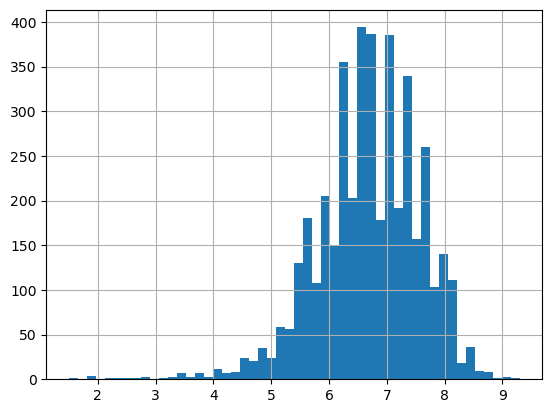

In [80]:
df4['Rating'].hist(bins=50)
scipy.stats.shapiro(df4['Rating'])

ShapiroResult(statistic=0.6661367061821644, pvalue=1.8541769382607302e-68)

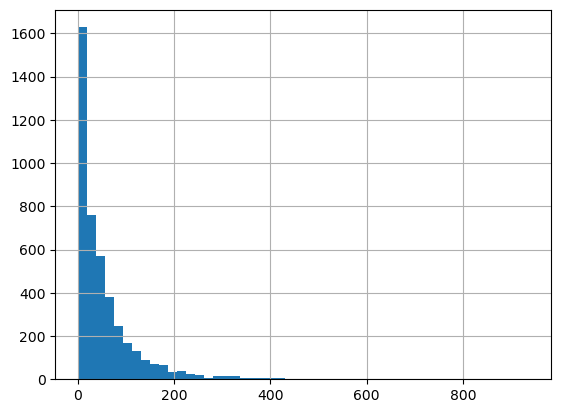

In [81]:
df4['Total_Gross'].hist(bins=50)
scipy.stats.shapiro(df4['Total_Gross'])

ShapiroResult(statistic=0.9142545946356505, pvalue=3.390402574446797e-44)

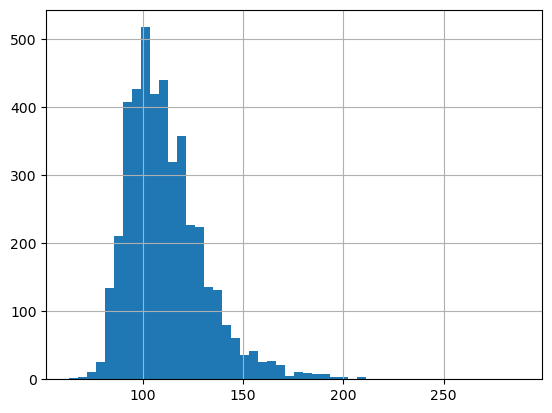

In [82]:
df4['Runtime(Mins)'].hist(bins=50)
scipy.stats.shapiro(df4['Runtime(Mins)'])

In [69]:
from scipy.stats import ranksums

In [76]:
generos = df4.main_genre.unique()
generos

for i in generos:
    x = df4['Total_Gross'][df4['main_genre']==i]
    y = df4['Total_Gross'][df4['main_genre']!=i]
    _,pval = ranksums(x,y,alternative="greater")
    if pval < 0.05:
        print(f"{i} gana más dinero que el resto (p-val: {pval})")


Action es significativamente mayor que el resto (p-val: 2.4698660684705755e-36)
Animation es significativamente mayor que el resto (p-val: 3.808476481619072e-26)
Adventure es significativamente mayor que el resto (p-val: 0.01725548194712018)


In [78]:
for i in generos:
    x = df4['Rating'][df4['main_genre']==i]
    y = df4['Rating'][df4['main_genre']!=i]
    _,pval = ranksums(x,y,alternative="greater")
    if pval < 0.05:
        print(f"{i} tienen más puntuación que el resto (p-val: {pval})")

Animation tienen más puntuación que el resto (p-val: 5.704430889566267e-08)
Biography tienen más puntuación que el resto (p-val: 1.0394962749975107e-31)
Drama tienen más puntuación que el resto (p-val: 3.812394789080123e-33)
Crime tienen más puntuación que el resto (p-val: 1.1410586945648209e-13)


In [83]:
for i in generos:
    x = df4['Runtime(Mins)'][df4['main_genre']==i]
    y = df4['Runtime(Mins)'][df4['main_genre']!=i]
    _,pval = ranksums(x,y,alternative="greater")
    if pval < 0.05:
        print(f"{i} tienen más duración que el resto (p-val: {pval})")

Action tienen más duración que el resto (p-val: 3.3520536476148153e-20)
Biography tienen más duración que el resto (p-val: 8.0262133243955145e-28)
Drama tienen más duración que el resto (p-val: 1.3189827542976817e-22)
Crime tienen más duración que el resto (p-val: 3.605008317273673e-07)
Mystery tienen más duración que el resto (p-val: 0.04545547218555973)


# Exercise 6 (2 point)

Construct a count matrix X for the different actors in the films <br>
Consider using this code: <br>




In [118]:
Actors = {i for i in re.split(', ', data.Actors[0])}
for i in data.Actors:
    for j in re.split(', ', i):
        Actors.add(j)
Actors = np.sort([i for i in Actors])
print(Actors)
Actors = np.sort([i for i in Actors])
print(len(Actors))

[' Star:Robert Redford' "'Weird Al' Yankovic" '50 Cent' ...
 'Émilie Leclerc' 'Ólafur Darri Ólafsson' 'Óscar Jaenada']
6873


Then:
- Delete variables with total frequency less than 10
- Apply PCA and plot the first 2 components
- Plot the PCA twice, one coloring by total_gross and other by main_genre.
- Do actors cluster revenue and by genre?

You can use from sklearn.decomposition import PCA

In [146]:
X = np.zeros((len(data), len(Actors)))

for i in range(len(data)):
    aux = re.split(", ", data["Actors"][i])
    X[i, np.isin(Actors, aux)] = 1


In [147]:
#sum by columns X
from operator import index


total_freq = X.sum(axis=0)

#index of cases in which total_freq is greater than 10
keep = np.where(total_freq > 10)[0]
keep

X = X[:, keep]
Actors = Actors[keep]
print(X.shape)

(4701, 345)


In [148]:
from sklearn.decomposition import PCA

In [149]:
from sklearn.preprocessing import StandardScaler
mat2 = X
scaler = StandardScaler()
scaler.fit(mat2)
StandardScaler()
X = scaler.transform(mat2)


In [150]:
pca = PCA().fit(X)
X_pca = pca.transform(X)
X_dev = pca.explained_variance_ #regular PCA
X_eigenvectors = pca.components_ #regular PCA


In [151]:
print(type(X_pca))
print(X_pca.shape)
print(X_dev[:10])
print(X_eigenvectors[:10])

print(X_dev[:5]/np.sum(X_dev))
print(np.sum(X_dev))


<class 'numpy.ndarray'>
(4701, 345)
[1.91608439 1.76793465 1.74607371 1.72949248 1.69930423 1.67211642
 1.66011675 1.65219946 1.62222237 1.60332938]
[[-0.0052104   0.01233078 -0.00232119 ... -0.00632053 -0.02790684
  -0.02629282]
 [ 0.00953427  0.02501464 -0.04969616 ...  0.03273058 -0.00486929
   0.15742573]
 [-0.00878277  0.01555361  0.0283413  ... -0.02159166  0.04762063
   0.18019473]
 ...
 [-0.00753207 -0.00115718  0.02265723 ... -0.08149459  0.0780936
   0.00631764]
 [-0.00879215  0.01060436 -0.11660144 ... -0.05666215 -0.01284707
  -0.00155692]
 [ 0.00387209  0.06618283  0.18878509 ... -0.0507978   0.0571081
  -0.01141214]]
[0.00555269 0.00512336 0.00506001 0.00501196 0.00492447]
345.0734042553192


In [152]:
#data.frame with components and more info
df = pd.DataFrame(X_pca)
df.columns = ['PC' + str(i+1) for i in range(X_pca.shape[1])]
df["Total_Gross"] = data.Total_Gross
df["main_genre"] = data.main_genre
df["decade"] = data.decade
df["Rating"] = data.Rating
df["Year"] = data.Year
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC341,PC342,PC343,PC344,PC345,Total_Gross,main_genre,decade,Rating,Year
0,2.476803,-0.136791,1.737561,-1.250337,3.449352,-0.026249,-3.435489,-0.885947,-0.868276,3.447848,...,0.193669,0.210281,-0.345246,-0.340394,-0.624976,534.86,Action,2000,9.0,2008
1,26.937864,5.259841,-2.209686,1.639660,3.633915,2.547341,0.619957,0.835831,-0.107505,-0.452065,...,-0.347960,-1.062996,-0.612589,1.343649,0.614954,377.85,Action,2000,9.0,2003
2,-0.216120,-0.776029,-0.020793,-0.055198,0.772857,-0.582469,1.009424,-1.249386,-0.885364,-1.418684,...,-1.796680,-1.096537,-0.359758,-0.190992,0.349773,292.58,Action,2010,8.8,2010
3,26.937864,5.259841,-2.209686,1.639660,3.633915,2.547341,0.619957,0.835831,-0.107505,-0.452065,...,-0.347960,-1.062996,-0.612589,1.343649,0.614954,342.55,Action,2000,8.8,2002
4,25.519876,5.524484,-2.291676,2.275234,2.565211,2.836741,0.183767,-0.328974,-1.064271,0.410515,...,0.382221,-1.271035,0.110753,0.792916,0.397938,315.54,Action,2000,8.8,2001


In [153]:
print(df.iloc[:5,:5])

         PC1       PC2       PC3       PC4       PC5
0   2.476803 -0.136791  1.737561 -1.250337  3.449352
1  26.937864  5.259841 -2.209686  1.639660  3.633915
2  -0.216120 -0.776029 -0.020793 -0.055198  0.772857
3  26.937864  5.259841 -2.209686  1.639660  3.633915
4  25.519876  5.524484 -2.291676  2.275234  2.565211


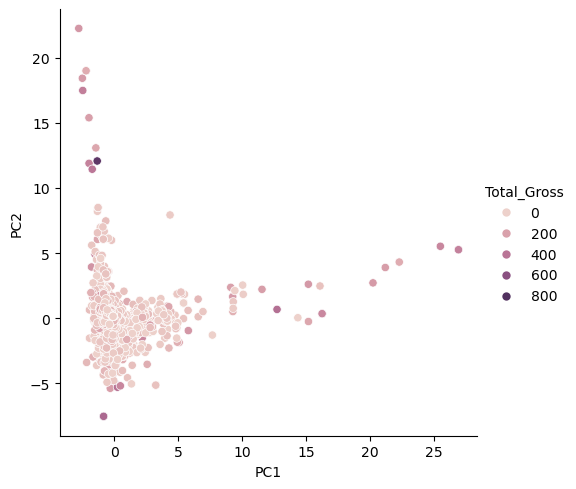

In [154]:
g = sns.relplot(data = df, x = "PC1", y = "PC2", hue="Total_Gross")

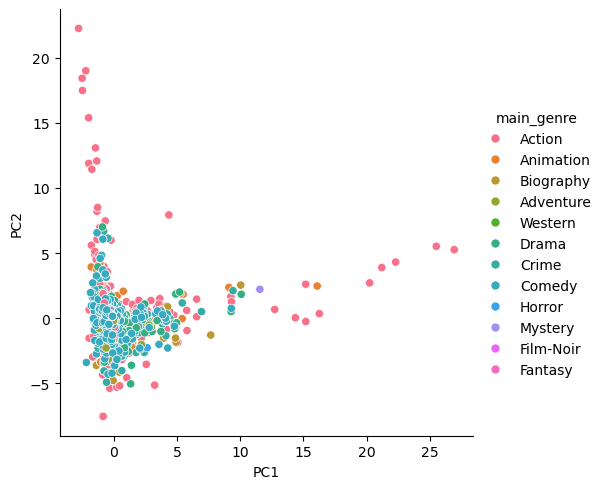

In [155]:
g = sns.relplot(data = df, x = "PC1", y = "PC2", hue="main_genre")

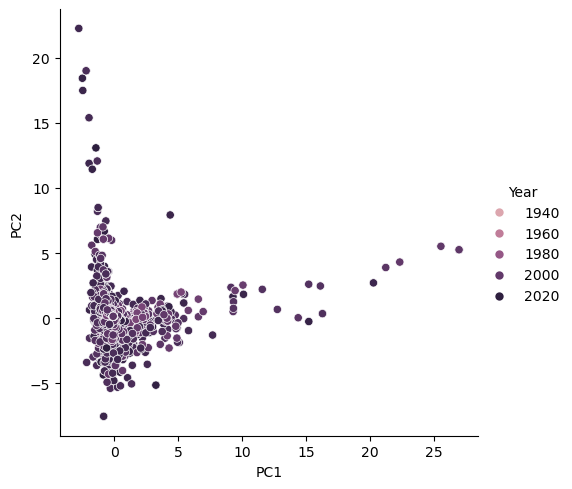

In [156]:
g = sns.relplot(data = df, x = "PC1", y = "PC2", hue="Year")

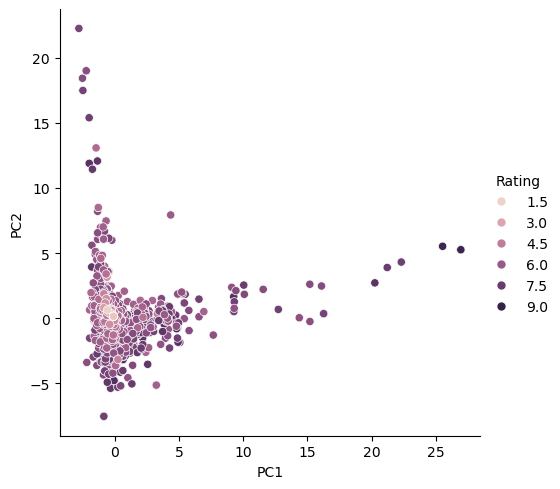

In [157]:
g = sns.relplot(data = df, x = "PC1", y = "PC2", hue="Rating")

<Axes: xlabel='PC1', ylabel='PC2'>

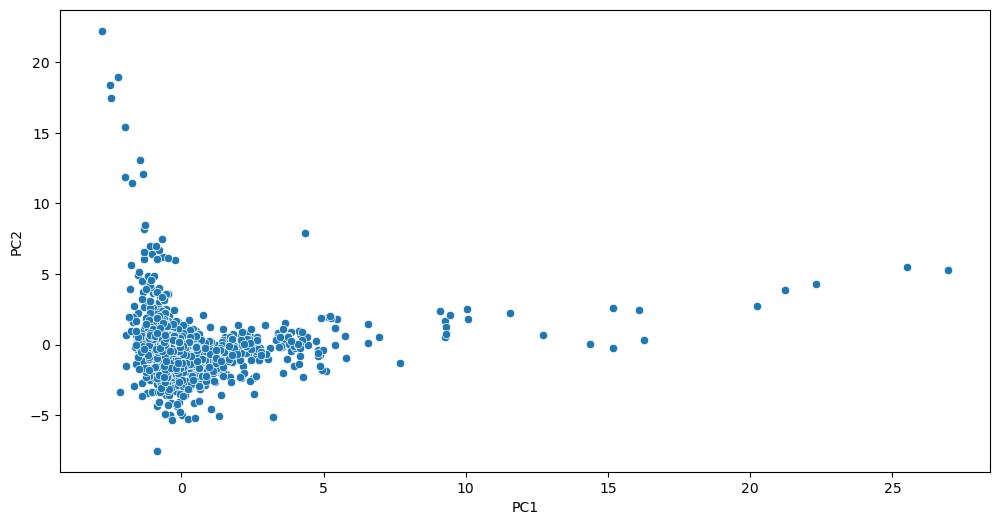

In [158]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

pcaDf = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2")